In [1]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')
print(movies.head(5))

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

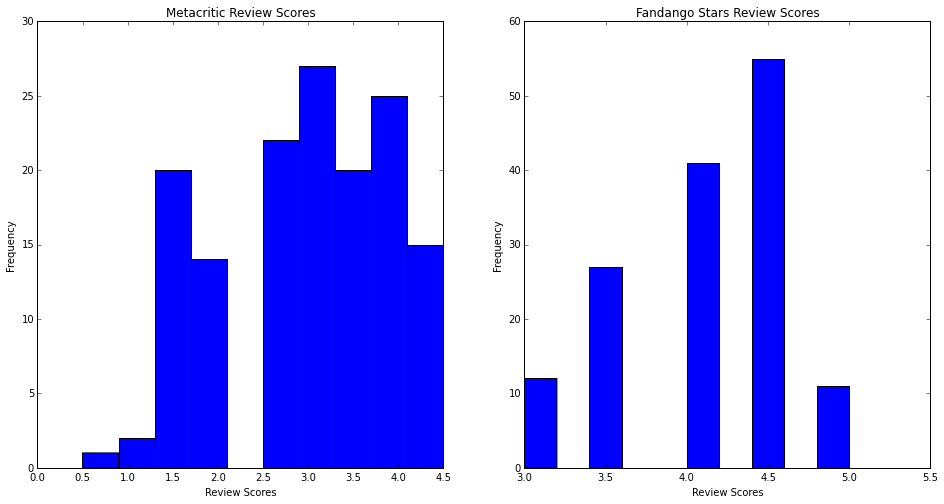

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(movies['Metacritic_norm_round'])
ax1.set(xlabel='Review Scores', ylabel='Frequency',title='Metacritic Review Scores')
ax2.hist(movies['Fandango_Stars'])
ax2.set(xlabel='Review Scores', ylabel='Frequency',title='Fandango Stars Review Scores')
plt.show()

From the first look itself, we can figure out that the review scores for Fandango are much more lenient as compared to those of Metacritic. 
Note: We have a clear distinction between poorly rated and highly rated movies for Metacritic, whereas since the Fandango Stars system also displays it, it is somewhat more fuzzy.

In [3]:
mean_fandango = movies['Fandango_Stars'].mean()
print(mean_fandango)
mean_metacritic = movies['Metacritic_norm_round'].mean()
print(mean_metacritic)

4.08904109589
2.97260273973


As you can clearly see that the mean scores of Fandango Stars are almost 25% greater as compared to those of Metacritic, providing some evidence to our observation earlier that Fandango Stars rating system was more lenient. Let's discover and try to prove it using more quantified statistics.

In [4]:
median_fandango = movies['Fandango_Stars'].median()
print(median_fandango)
median_metacritic = movies['Metacritic_norm_round'].median()
print(median_metacritic)

4.0
3.0


Looking at the median scores, it proves that there is a exact difference of 1.0 between the median scores of both the rating systems. Let's look at the Standard deviation betweem both to see which of the two has a tendency to vary more.

In [5]:
import numpy as np
std_fandango = np.std(movies['Fandango_Stars'])
print(std_fandango)
std_metacritic = np.std(movies['Metacritic_norm_round'])
print(std_metacritic)

0.53853216127
0.987561029704


From the values above, we can see that the review scores for Metacritic have a higher standard deviation showing that the scores are more "Spread Out" as compared to that of Fandango. 
This can be proved by the review methodology of both, for Fandango, its more about whether you want to see the movie or not. The values are much more skewed as compared to other rating sites and hence prove that Fandango as a movie rating system, is not so reliable.

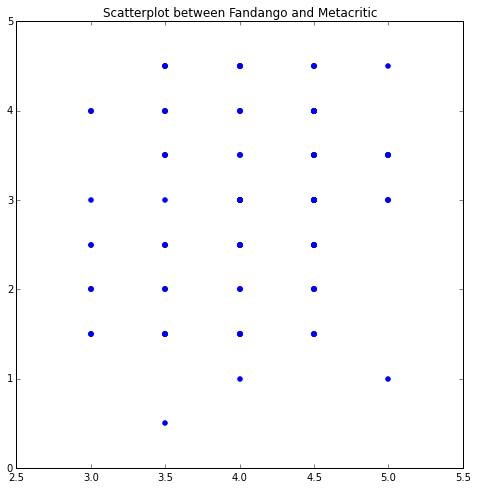

In [6]:
#Making a scatterplot between Fandango and Metacritic for comparison
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
x = movies['Fandango_Stars']
y = movies['Metacritic_norm_round']
plt.scatter(x,y,color='b')
ax.set(title='Scatterplot between Fandango and Metacritic')
plt.show()

In [7]:
fm_diff = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = fm_diff
movies['fm_diff'] = np.absolute(movies['fm_diff'])
movies.sort('fm_diff',ascending=False,inplace=True)
print(movies[['FILM','fm_diff','Fandango_Stars','Metacritic_norm_round']].head(5))

                        FILM  fm_diff  Fandango_Stars  Metacritic_norm_round
3     Do You Believe? (2015)        4             5.0                    1.0
85         Little Boy (2015)        3             4.5                    1.5
47              Annie (2014)        3             4.5                    1.5
19             Pixels (2015)        3             4.5                    1.5
134  The Longest Ride (2015)        3             4.5                    1.5


From the output above, we can see the top 5 movies with the most disparity between the two styles of ratings. The conclusion is that the movies above were rated poorly by Metacritic but were rated very highly by Fandango since the absolute difference between them is 4 for the first movie and 3 for the rest. 

In [8]:
from scipy.stats.stats import pearsonr
r, p_value = pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
print(r)

0.178449190739


From the above output, we can see that the correlation or the r-value is fairly close to 0 indicating that there is very little correlation between the two variables i.e the two ratings system as was hypothesized before. 
Strong non-correlation means that the two variables have no distinct pattern matching between them and are independent of each other.

In [9]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
def predict_y(x):
     return((slope*x) + intercept)
fand_predict = predict_y(3.0)
print(fand_predict)

4.09170715282


Using Linear Regression, we create a linear relationship between Metacritic and Fandango rating systems. We observe that a rating of 3.0 on the Metacritic system would yield a corresponding rating of ~4.09 on the Fandango system.

4.1890182308


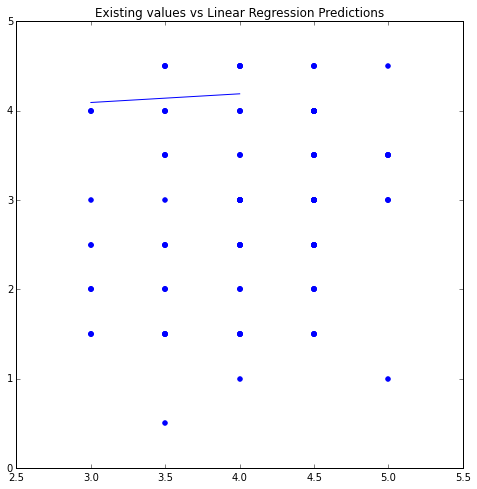

In [14]:
fand_predict_4 = predict_y(4.0)
print(fand_predict_4)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
x = movies['Fandango_Stars']
y = movies['Metacritic_norm_round']
plt.scatter(x,y,color='b')
x_values = [3.0,4.0]
y_values = [predict_y(p) for p in x_values]
ax.set(title='Existing values vs Linear Regression Predictions')
ax.plot(x_values,y_values)
plt.show()